# YOLOv8 - Custom Model Training

Project used for gas cylinder detection

In this file, you'll find the processing and evaluation.

## Install YOLOv8

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.5/644.5 kB 7.8 MB/s eta 0:00:00


## Import Libraries:

In [ ]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

## Configuring the execution environment

In [ ]:
import locale #google feature configurations
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Check is avallable GPU


In [ ]:
!nvidia-smi

Sat Oct 21 21:18:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Dataset Struture

* /dataset
  * /train
  * /val

In [ ]:
!mkdir dataset

### Copy custom files:

In [ ]:
!cp -r /content/gdrive/Othercomputers/NoteIULI/Work/nova_fase/novos_dados /content/dataset

In [ ]:
def show_img(img):
  fig = plt.gcf()
  fig.set_size_inches(16, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

## YAML file

In [ ]:
!touch configs_modelo.yaml

In [ ]:
%%writefile configs_modelo.yaml
path: '/content/dataset/novos_dados/'
train: 'train/'
val: 'val/'
test: # opcional

nc: 1
names: ['Gas',]

Overwriting configs_modelo.yaml


## Model Training

In [ ]:
diretorio_raiz = '/content/'
arquivo_config = os.path.join(diretorio_raiz, 'configs_modelo.yaml')

"> **Training Function Parameters:**

* **task**: what we aim to achieve with the training. Since we are working on object detection, leave the value as 'detect.' Other accepted options are 'segment' and 'classify.' It's optional to specify detection since it defaults to detection unless otherwise specified.
* **mode**: can be train, val, or predict. Since we are performing this using Python and want to train, we will use the train() function, making this parameter unnecessary.
* **model**: the pre-trained model we want to use as a 'starting point.' It can be YOLOv8 Nano (YOLOv8n), YOLOv8 Small (YOLOv8s), and so on.
* **imgsz**: The image size that the network processes (note: you don't need to resize the image to this size beforehand; the algorithm handles this before passing the input image to the network). The default resolution is 640x640 pixels, so the default value is 640. A larger size leads to more precise detection, especially for objects with small details, but it makes training and detection more time-consuming.
* **data**: path to the YAML file. This is the file we created above, which contains the path to the training and validation set and should also include the names of the classes we want to train.
* **epochs**: Number of epochs we want to train for.
* **batch**: The batch size for the data loader. You can increase or decrease it based on your GPU's memory availability, in case you encounter memory issues. The default value is 16.
* **name**: Name of the results directory for runs/detect. (optional)

In our tests, we will choose Small because we have GPU limits using collab


### Creating the model that will be used for the transfer learging

In [ ]:
model = YOLO('yolov8s.yaml')


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

### Training - first process

In [ ]:
resultados = model.train(data=arquivo_config, epochs=40, imgsz=640, name='yolov8s_modelo')

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/configs_modelo.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_modelo, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, kera

In [ ]:
dir_resultado = '/content/runs/detect/yolov8s_modelo'

### Evaluation

In [ ]:
!yolo task=detect mode=val model={dir_resultado}/weights/best.pt name=yolov8m_modelo_eval data=/content/configs_modelo.yaml

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/dataset/novos_dados/val.cache... 24 images, 0 backgrounds, 0 corrupt: 100% 24/24 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.31it/s]
                   all         24        129       0.82       0.55      0.681      0.391
Speed: 0.2ms preprocess, 23.1ms inference, 0.0ms loss, 15.4ms postprocess per image
Results saved to runs/detect/yolov8m_modelo_eval
💡 Learn more at https://docs.ultralytics.com/modes/val


### Evaluation Graph

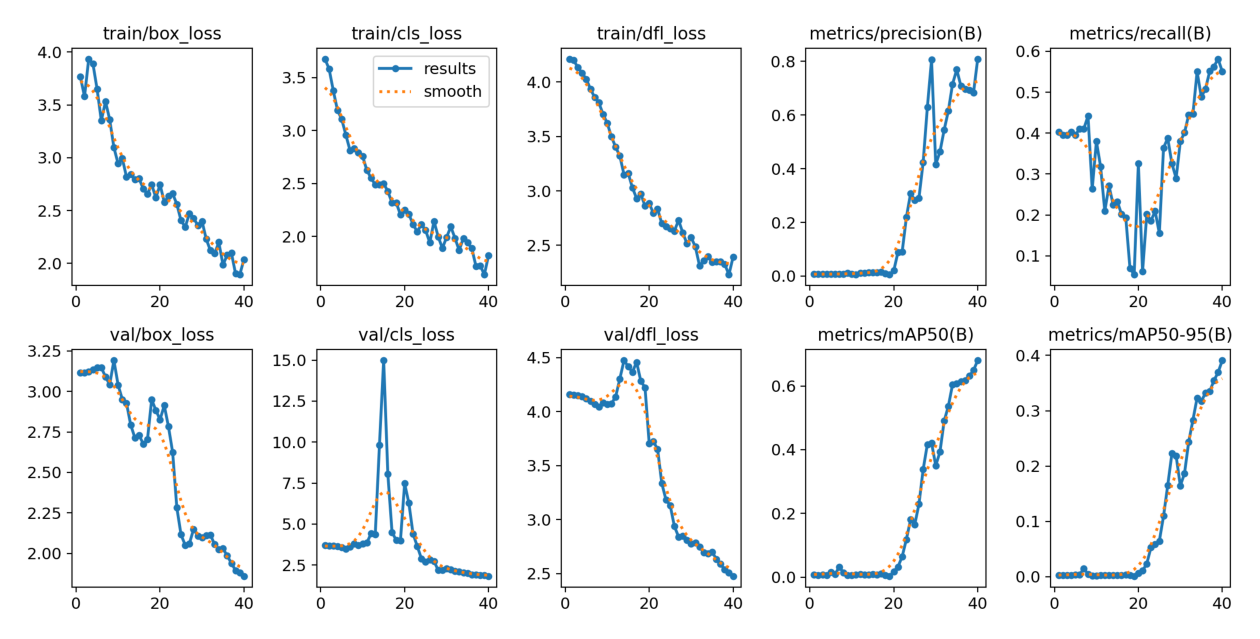

In [ ]:
resultados_grafico = cv2.imread(os.path.join(dir_resultado, 'results.png'))
show_img(resultados_grafico)

In [ ]:
dir_resultado_val = '/content/runs/detect/yolov8m_modelo_eval'

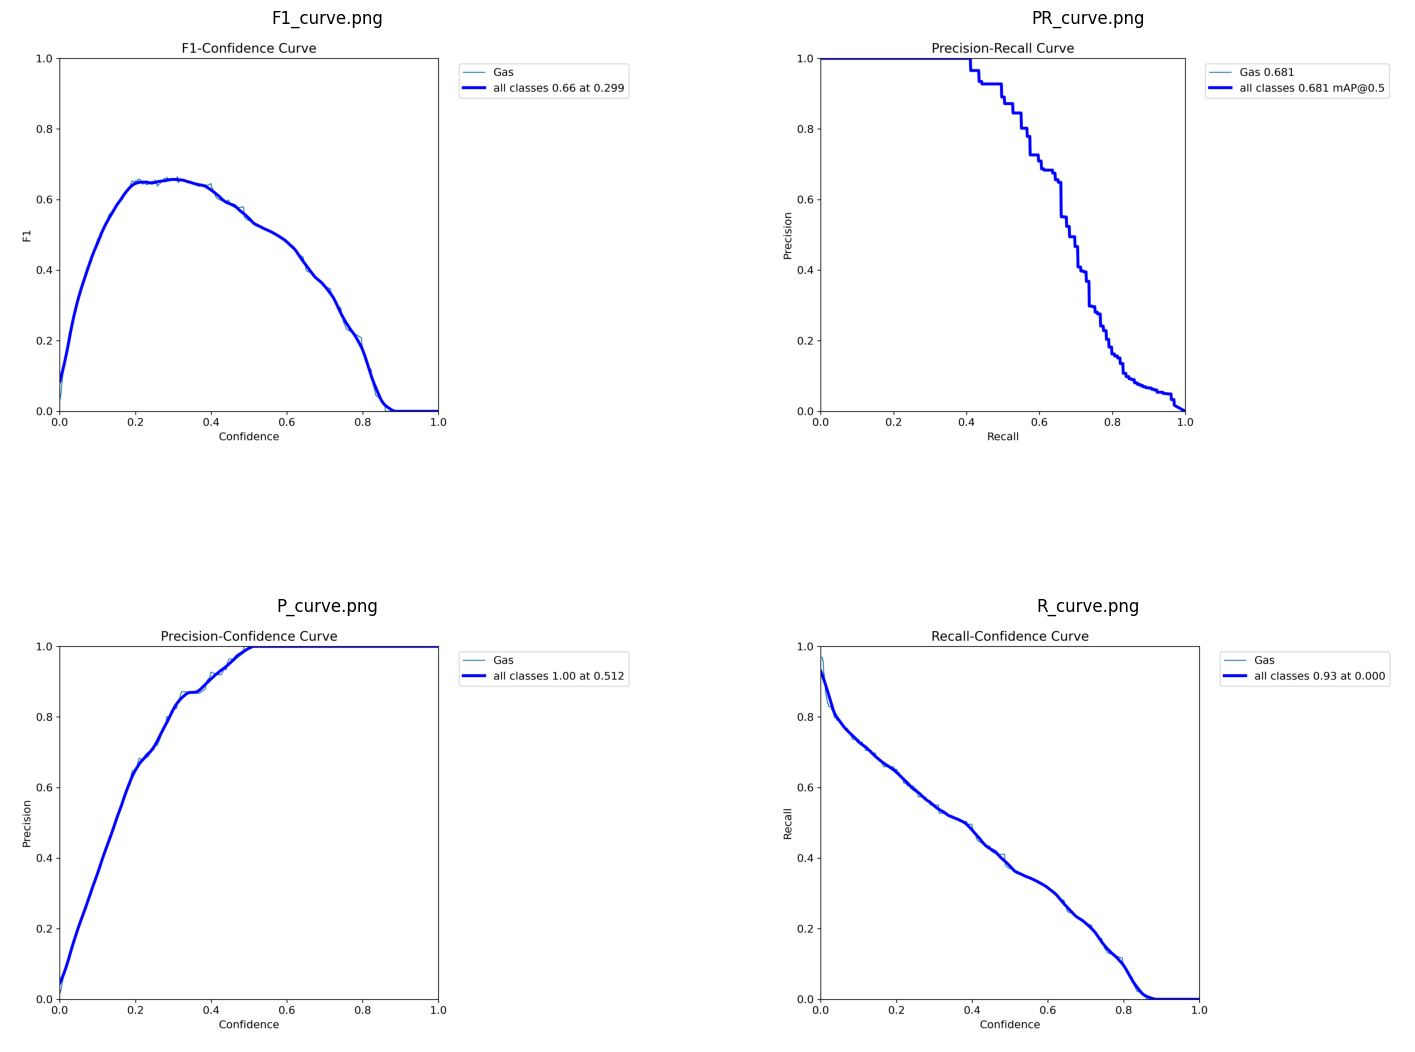

In [ ]:
imgs = ['F1_curve.png', 'PR_curve.png', 'P_curve.png', 'R_curve.png']
plt.figure(figsize=(18,14))
for i, img in enumerate(imgs):
  grafico = cv2.imread(os.path.join(dir_resultado_val, img))
  grafico = cv2.cvtColor(grafico, cv2.COLOR_BGR2RGB)
  plt.subplot(2, 2, i + 1)
  plt.title(imgs[i])
  plt.imshow(grafico)
  plt.axis('off')
plt.show()

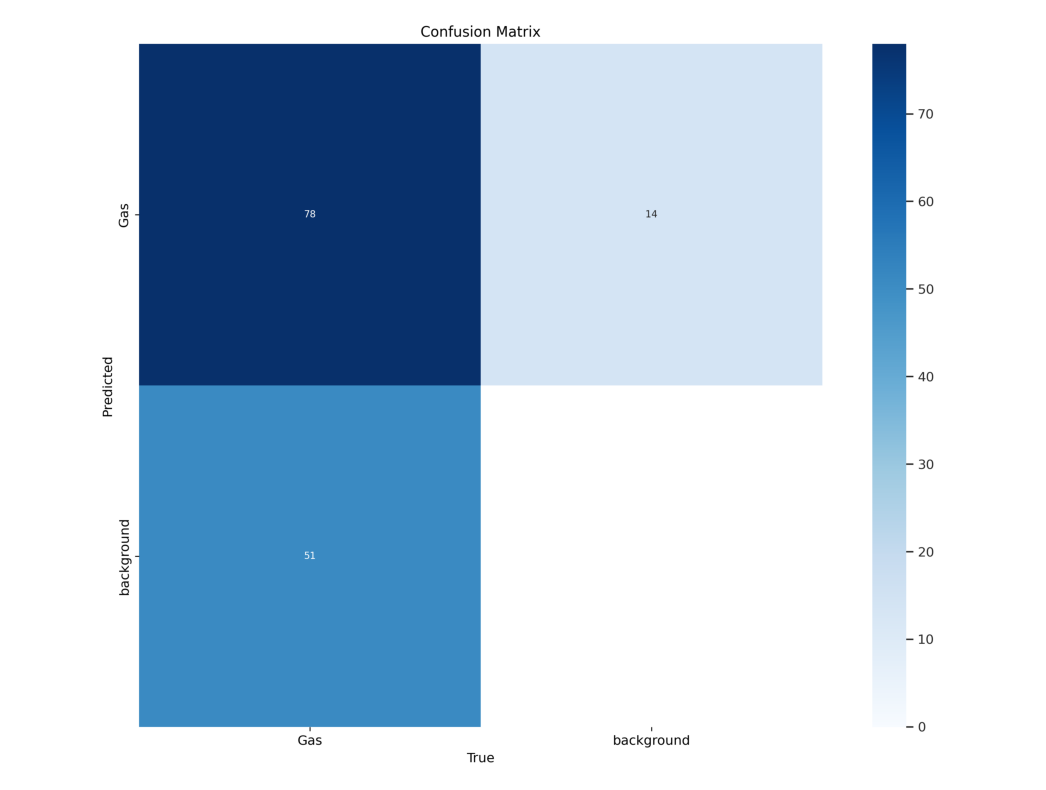

In [ ]:
matriz_confusao = cv2.imread(os.path.join(dir_resultado_val, 'confusion_matrix.png'))
show_img(matriz_confusao)

### Training - second process

In [ ]:
!yolo task=detect mode=train model=/content/runs/detect/yolov8s_modelo/weights/last.pt data={arquivo_config} epochs=30

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/yolov8s_modelo/weights/last.pt, data=/content/configs_modelo.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=

### Training - Last one:

In [ ]:
!yolo task=detect mode=train model=/content/runs/detect/train/weights/last.pt data={arquivo_config} epochs=50

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train/weights/last.pt, data=/content/configs_modelo.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, fo

Copy final results:

In [ ]:
cp -r /content/runs/detect/train2 /content/gdrive/Othercomputers/NoteIULI/Work/nova_fase


### Evaluations

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt name=train2_modelo_eval data=configs_modelo.yaml

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/dataset/novos_dados/val.cache... 24 images, 0 backgrounds, 0 corrupt: 100% 24/24 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.01it/s]
                   all         24        129      0.867      0.736      0.843      0.577
Speed: 10.0ms preprocess, 25.5ms inference, 0.0ms loss, 12.6ms postprocess per image
Results saved to runs/detect/train2_modelo_eval
💡 Learn more at https://docs.ultralytics.com/modes/val


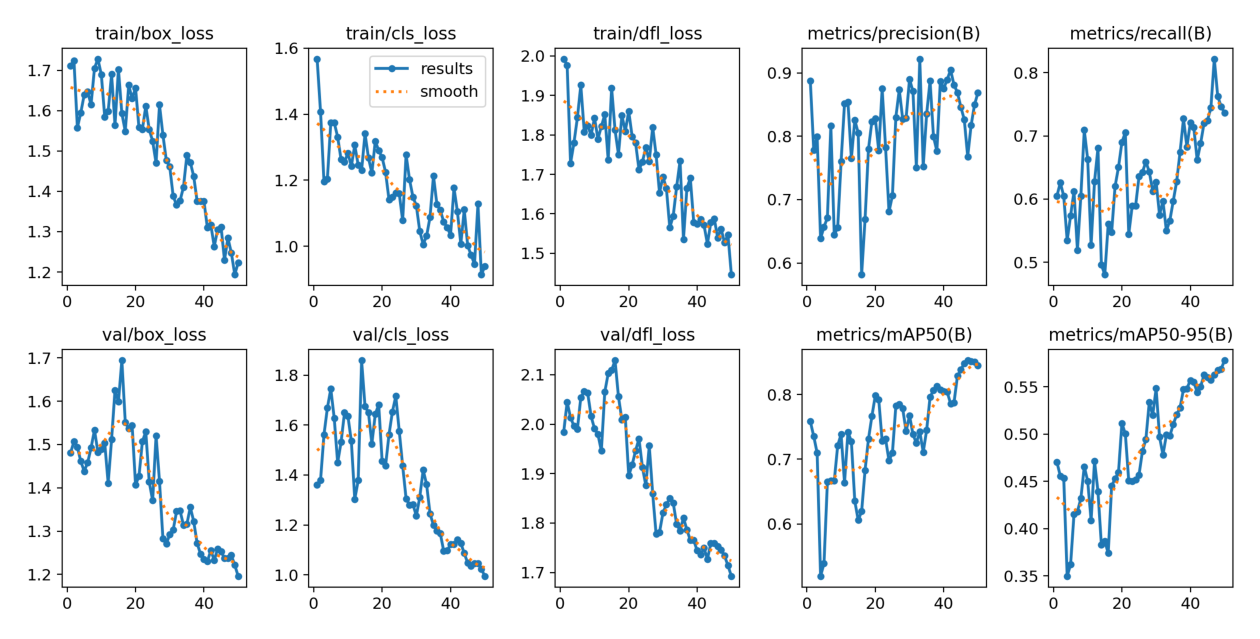

In [ ]:
resultados_grafico = cv2.imread(os.path.join('/content/runs/detect/train2', 'results.png'))
show_img(resultados_grafico)

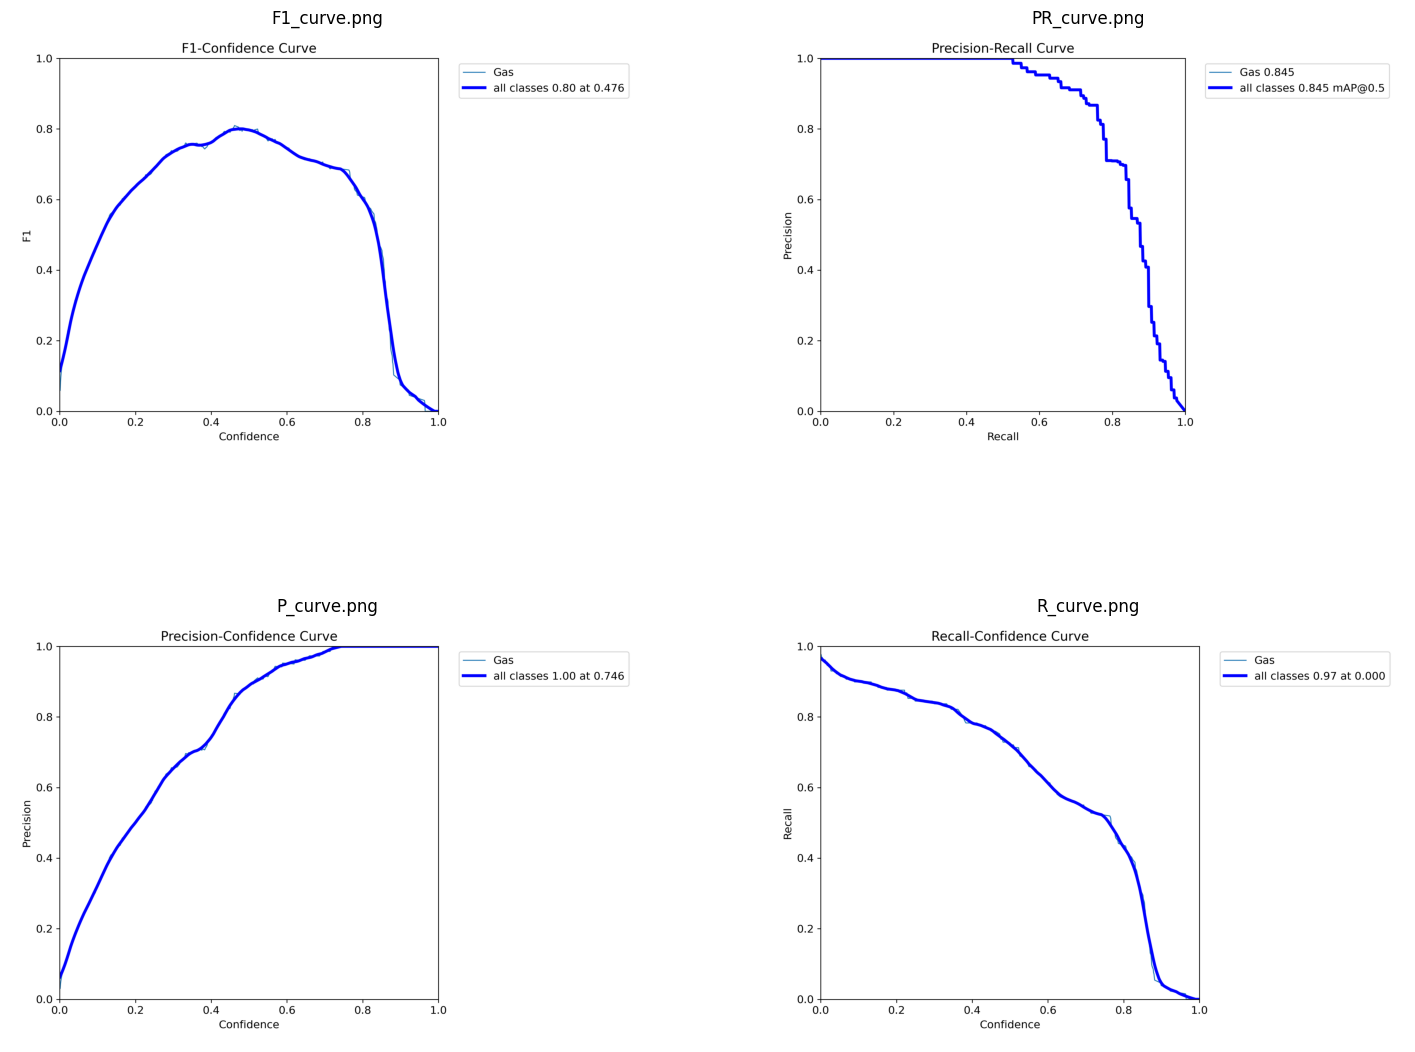

In [ ]:
dir_resultado_val = 'runs/detect/train2'

imgs = ['F1_curve.png', 'PR_curve.png', 'P_curve.png', 'R_curve.png']
plt.figure(figsize=(18,14))
for i, img in enumerate(imgs):
  grafico = cv2.imread(os.path.join(dir_resultado_val, img))
  grafico = cv2.cvtColor(grafico, cv2.COLOR_BGR2RGB)
  plt.subplot(2, 2, i + 1)
  plt.title(imgs[i])
  plt.imshow(grafico)
  plt.axis('off')
plt.show()

### Predict

In [ ]:
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' source='/content/gdrive/Othercomputers/NoteIULI/Work/nova_fase/test/' save=true

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/5 /content/gdrive/Othercomputers/NoteIULI/Work/nova_fase/test/T1.png: 512x640 19 Gass, 67.7ms
image 2/5 /content/gdrive/Othercomputers/NoteIULI/Work/nova_fase/test/T2.png: 416x640 13 Gass, 68.3ms
image 3/5 /content/gdrive/Othercomputers/NoteIULI/Work/nova_fase/test/T3.png: 480x640 2 Gass, 66.8ms
image 4/5 /content/gdrive/Othercomputers/NoteIULI/Work/nova_fase/test/T4.jpg: 384x640 24 Gass, 70.1ms
image 5/5 /content/gdrive/Othercomputers/NoteIULI/Work/nova_fase/test/T5.jpg: 448x640 8 Gass, 66.1ms
Speed: 2.4ms preprocess, 67.8ms inference, 18.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
dir_resultados = '/content/runs/detect/predict/'
caminhos = [os.path.join(dir_resultados, f) for f in os.listdir(dir_resultados)]

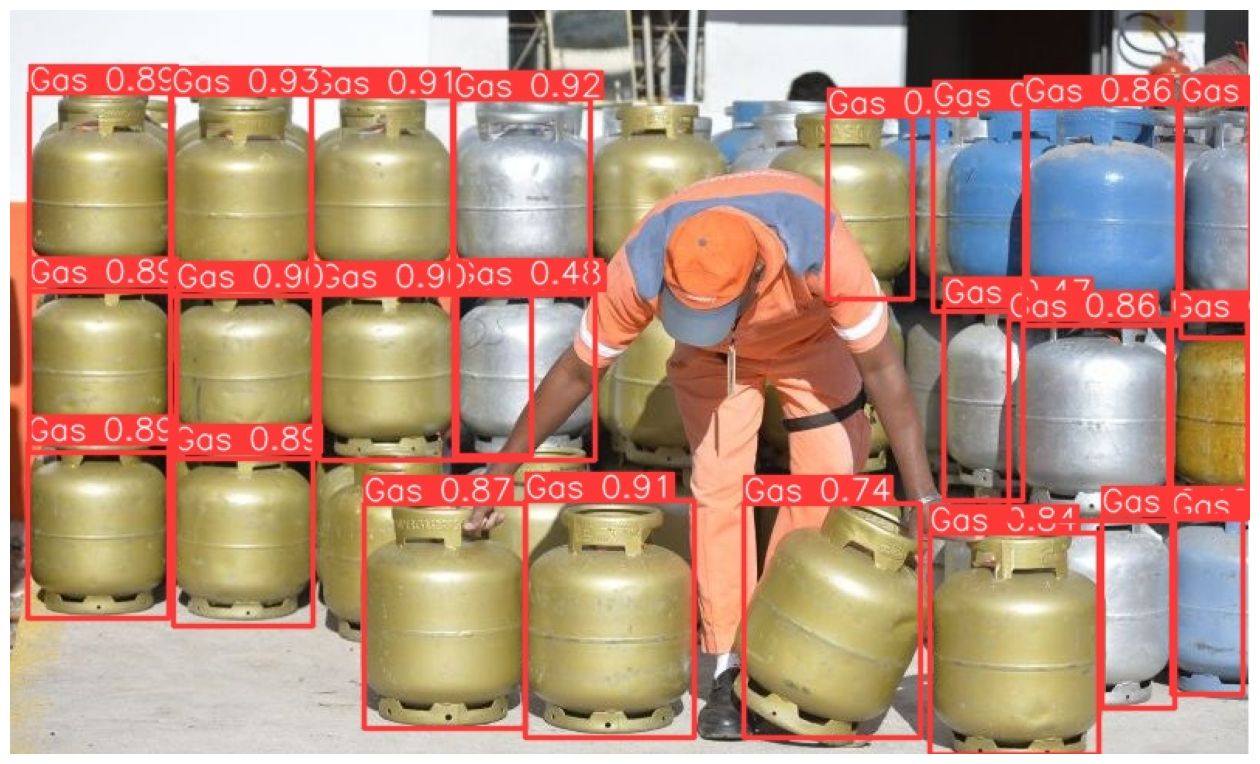

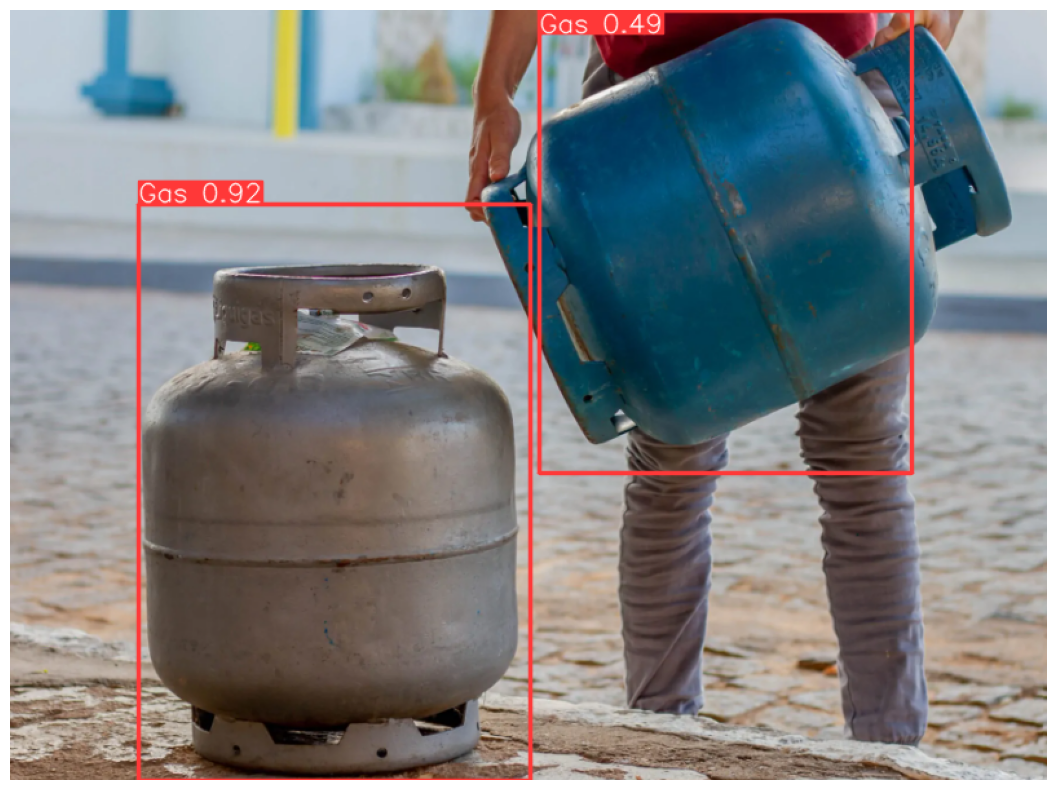

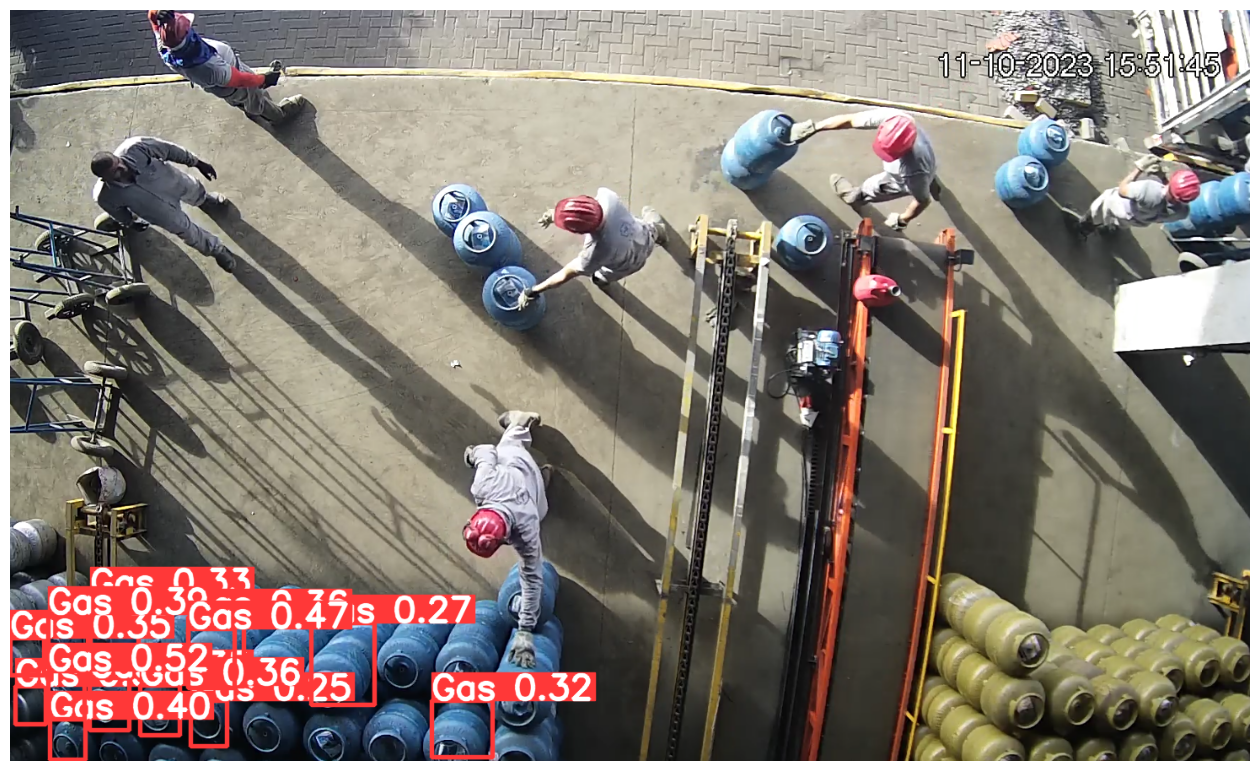

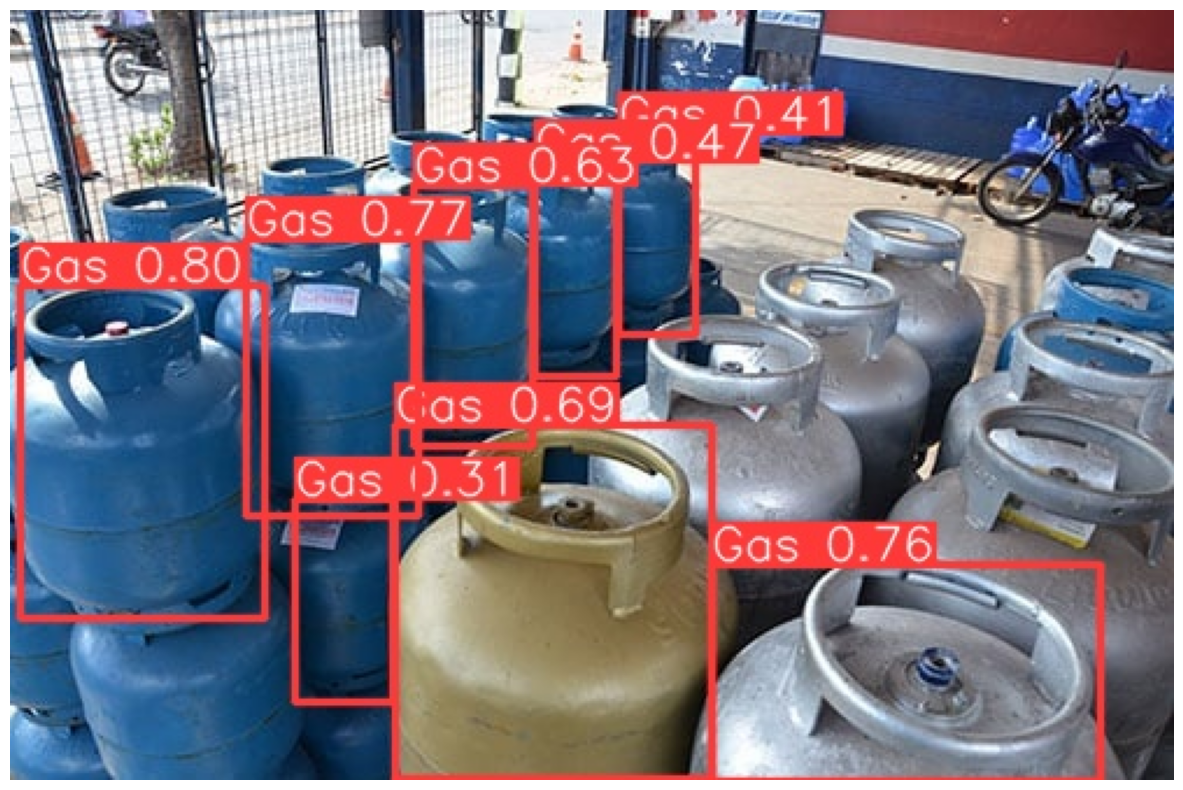

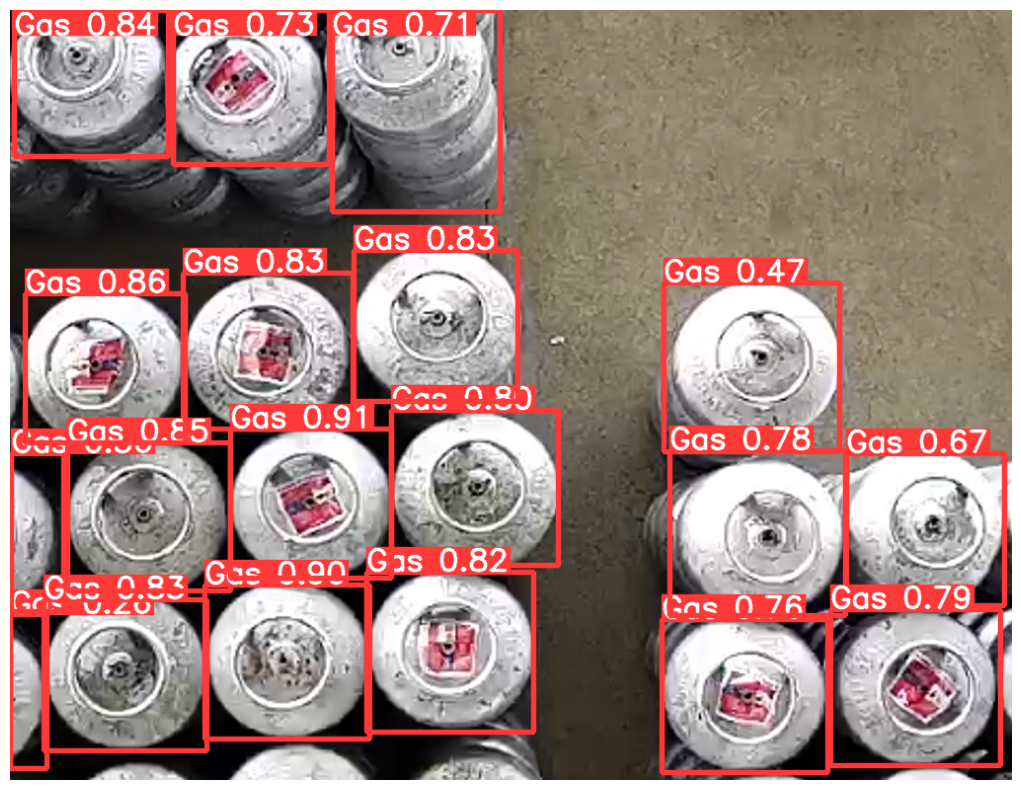

In [ ]:
for caminho_imagem in caminhos:
  #print(caminho_imagem)
  imagem = cv2.imread(caminho_imagem)
  show_img(imagem)